## Análisis exploratorio

#### Importación de las librerias necesarias 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#### 1. Cargar el dataset

Carga del dataset

In [3]:
mercadona_df = pd.read_csv('datasets/dataset_unificado_mercadona.csv')

Visualización de las primeras filas del dataset

In [4]:
print('Visualización de las primeras filas del dataset:\n')
mercadona_df.head()

Visualización de las primeras filas del dataset:



,id,supermarket,category,name,price,reference_price,reference_unit,insert_date,PIBFecha
0,248789,mercadona-es,fruta,Banana,0.26,1.29,kg,2020-07-21 16:06:00,287.632
1,248790,mercadona-es,fruta,PlÃ¡tano,0.34,1.99,kg,2020-07-21 16:06:00,287.632
2,248791,mercadona-es,fruta,PlÃ¡tano macho,0.58,1.95,kg,2020-07-21 16:06:00,287.632
3,248792,mercadona-es,fruta,Uva blanca sin semillas,2.84,3.79,kg,2020-07-21 16:06:00,287.632
4,248793,mercadona-es,fruta,Uva negra sin semillas,2.99,3.99,kg,2020-07-21 16:06:00,287.632


Visualización de la información de los datos del dataset

In [5]:
print('Visualización de la información de datos del dataset')
mercadona_df.info()

Visualización de la información de datos del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761102 entries, 0 to 761101
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               761102 non-null  int64  
 1   supermarket      761102 non-null  object 
 2   category         761102 non-null  object 
 3   name             761102 non-null  object 
 4   price            761102 non-null  float64
 5   reference_price  761102 non-null  float64
 6   reference_unit   761102 non-null  object 
 7   insert_date      761102 non-null  object 
 8   PIBFecha         761102 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 52.3+ MB


Visualización de los datos estadisticos del dataset

In [6]:
print('Visualización de los datos estadisticos del dataset:\n')
mercadona_df.describe()

Visualización de los datos estadisticos del dataset:



,id,price,reference_price,PIBFecha
count,7.611020e+05,761102.000000,761102.000000,7.611020e+05
mean,6.293395e+05,6.265762,6.946805,2.876320e+02
std,2.197114e+05,67.922137,12.292162,3.979042e-13
min,2.487890e+05,0.100000,0.010000,2.876320e+02
25%,4.390642e+05,1.210000,1.630000,2.876320e+02
50%,6.293395e+05,1.980000,3.980000,2.876320e+02
75%,8.196148e+05,3.740000,8.000000,2.876320e+02
max,1.009890e+06,2470.050000,432.430000,2.876320e+02


Visualización de datos nulos

In [7]:
print('Visualización de los datos nulos:\n')
mercadona_df.isnull().sum()

Visualización de los datos nulos:



id                 0
supermarket        0
category           0
name               0
price              0
reference_price    0
reference_unit     0
insert_date        0
PIBFecha           0
dtype: int64

#### 2. Exploración de la columna 'reference_unit'

In [8]:
print(mercadona_df['reference_unit'].value_counts())

reference_unit
kg        376548
L         144167
ud        123283
100 ml     89550
100 g      21829
lv          4321
dc           936
m            468
Name: count, dtype: int64


#### 3. Normalización de los precios de referencia y de las unidades

In [9]:
def normalize_units(row):
    if row['reference_unit'] == 'g':
        return row['reference_price'] / 1000  # Convertir a kg
    elif row['reference_unit'] == 'ml':
        return row['reference_price'] / 1000  # Convertir a litros
    elif row['reference_unit'] in ['kg', 'litro']:
        return row['reference_price']  # Dejar igual si ya está en kg o litros
    else:
        return row['reference_price']  # Mantener como está para otras unidades

Aplicar la función para crear una nueva columna 'normalized_reference_price'

In [10]:
mercadona_df['normalized_reference_price'] = mercadona_df.apply(normalize_units, axis=1)

#### 4. Normalización  de la columna 'reference_unit'

In [11]:
def normalize_reference_unit(unit):
    if unit == 'g':
        return 'kg'
    elif unit == 'ml':
        return 'litro'
    else:
        return unit

Crear la columna 'normalized_reference_unit'

In [12]:
mercadona_df['normalized_reference_unit'] = mercadona_df['reference_unit'].apply(normalize_reference_unit)

Comprobar la columna 'PIBFecha' es numérica

In [13]:
assert mercadona_df['PIBFecha'].dtype == 'float64', "La columna 'PIBFecha' debería ser de tipo float."

#### 5. Análisis visual

Variabilidad de los precios normalizados por categoría

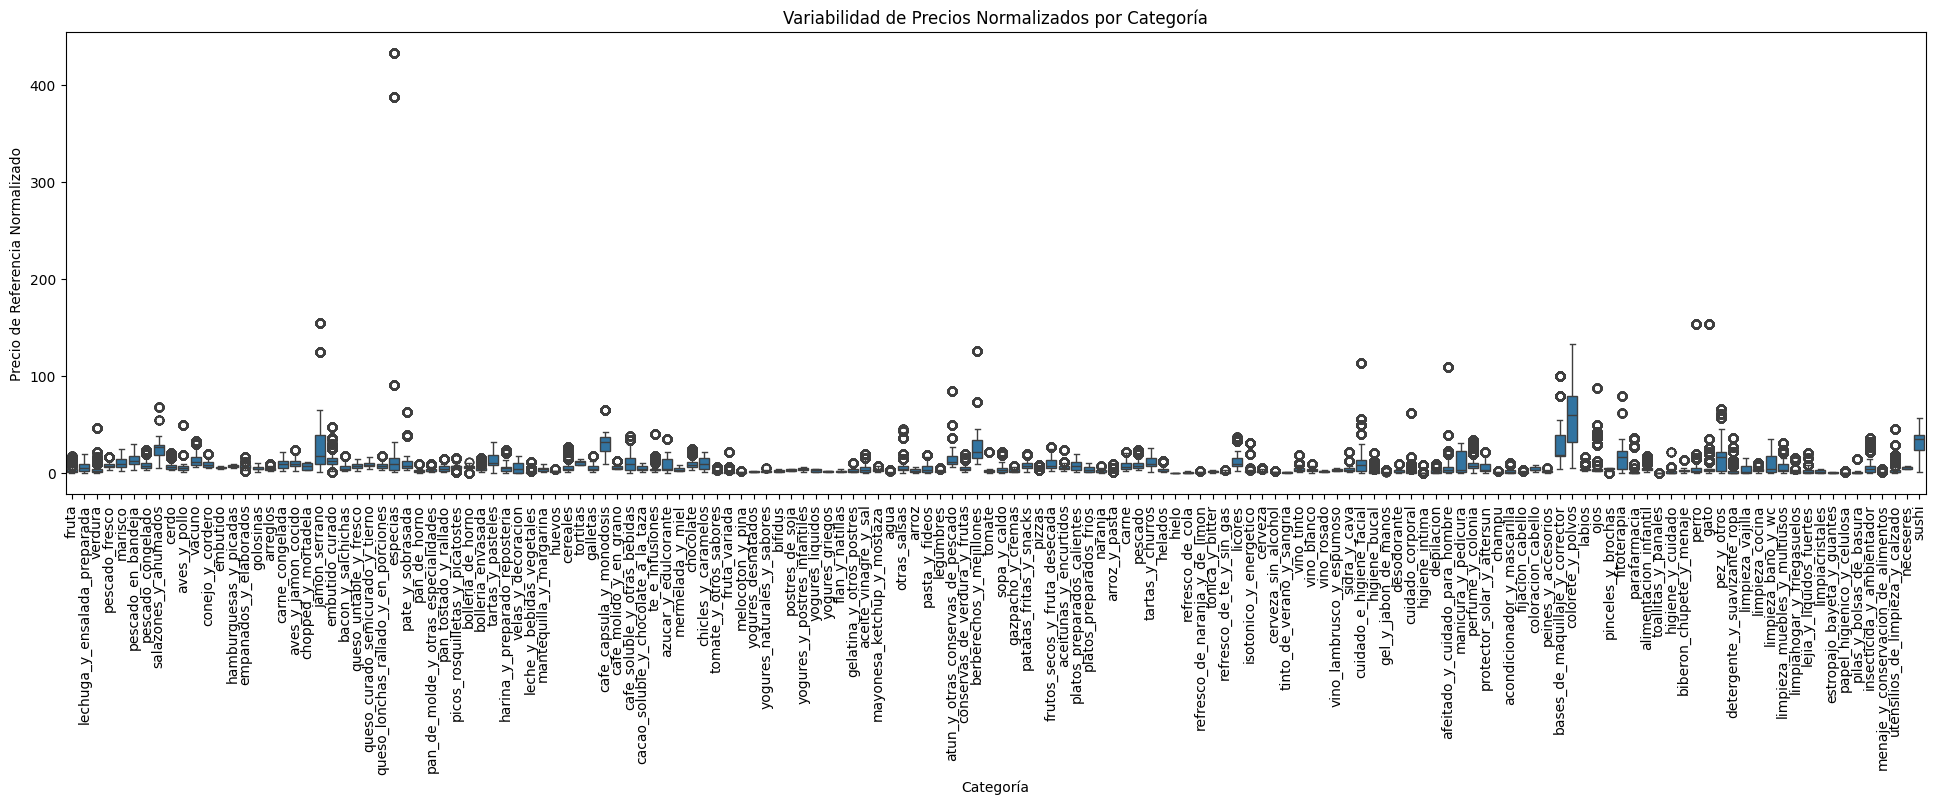

In [14]:
plt.figure(figsize=(24, 6))
sns.boxplot(x='category', y='normalized_reference_price', data=mercadona_df)
plt.xticks(rotation=90)
plt.xlabel('Categoría')
plt.ylabel('Precio de Referencia Normalizado')
plt.title('Variabilidad de Precios Normalizados por Categoría')
plt.show()

#### 6. Agrupación por unidades normalizadas

In [15]:
normalized_price_mean = mercadona_df.groupby('normalized_reference_unit')['normalized_reference_price'].mean()
print(normalized_price_mean)

normalized_reference_unit
100 g     19.417427
100 ml     8.964935
L          3.500632
dc         1.713750
kg         8.488399
lv         0.132326
m          0.037500
ud         2.898982
Name: normalized_reference_price, dtype: float64


#### 7. Exploración de la Relación entre el PIB y el Precio Normalizado

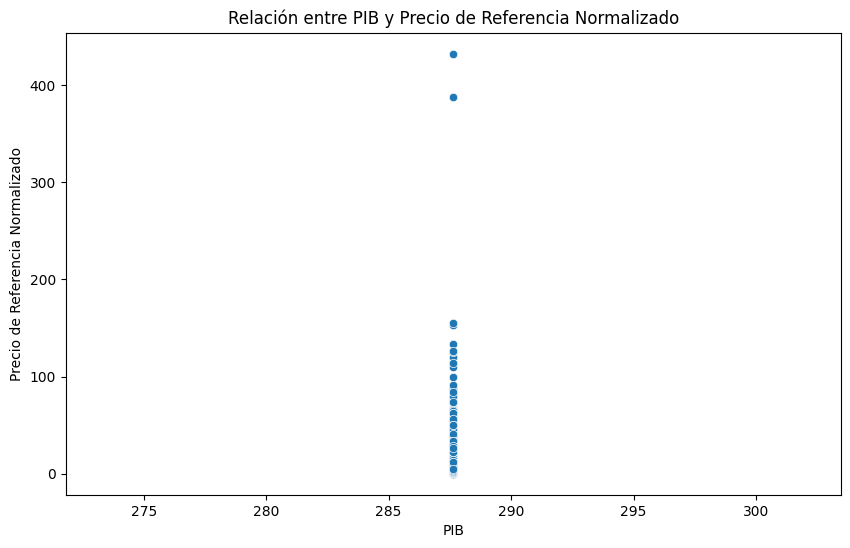

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PIBFecha', y='normalized_reference_price', data=mercadona_df)
plt.xlabel('PIB')
plt.ylabel('Precio de Referencia Normalizado')
plt.title('Relación entre PIB y Precio de Referencia Normalizado')
plt.show()

#### 8. Mapa de calor para la matriz de correlación 

Convertir las columnas categóricas a numéricas antes de calcular la correlación


In [17]:
df_numeric = mercadona_df.copy()
for col in df_numeric.select_dtypes(include='object').columns:
    df_numeric[col] = df_numeric[col].astype('category').cat.codes


Eliminar columnas irrelevantes para la matriz de correlación


In [18]:
df_numeric.drop(['id', 'supermarket', 'PIBFecha'], axis=1, inplace=True)

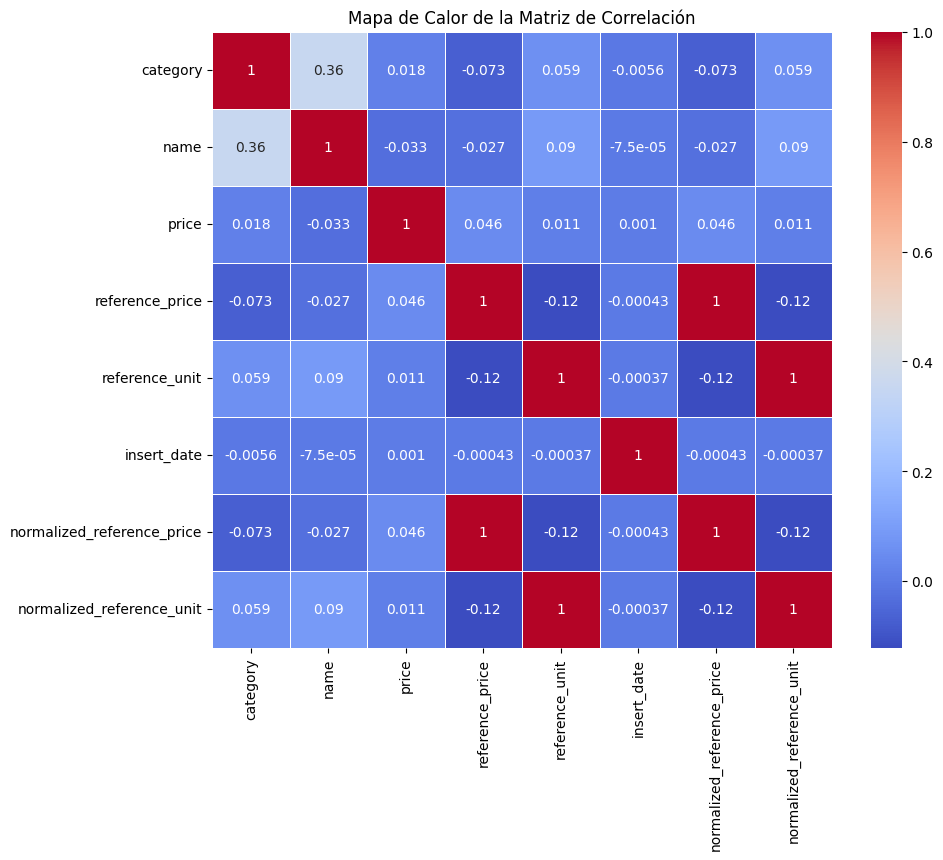

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

In [20]:
def check_unique_values(df, column_name):
    return df[column_name].is_unique
is_unique = check_unique_values(mercadona_df, 'PIBFecha')
print(f"Los valores de la columna 'PIBFecha' son únicos: {is_unique}")

Los valores de la columna 'PIBFecha' son únicos: False
